https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

Attribute Information:

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [1]:
import numpy as np
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')
# data.info()
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [3]:
#перетворюємо данні в числові для подальшої роботи
#2. data['gender'] стать перетворюємо жінки, інші = 0 ; чоловіки =1 
#(інші == жінки, адже жінок більше у вибірці, більша ймовірність що та особа саме тієї статі)
data['Int_Gender'] = np.where(data['gender'] == 'Male', 1, 0)

#6 data['ever_married'] Чи був колись одружений? перетворюєм в числові Так == 1; Ні == 0
data['Int_Ever_Married'] = np.where(data['ever_married'] == 'Yes', 1, 0) 

#8 data['Residence_type'] місце проживання місто == 0, село == 1
data['Int_Residence_type'] = np.where(data['Residence_type'] == 'Rural', 1, 0)

In [4]:
def func3_2(elem):
    if elem == 'Never_worked' or elem == 'children':
        return 'Never_worked'
    
    if elem == 'Private' or elem == 'Govt_job':
        return 'Company_worker'
    
    if elem == 'Self-employed':
        return 'Self-employed'


In [5]:
#7 data['work_type'] після аналізу впливу роботи на ризик інсульту, робюим 3 класи, в залежності від ризику інсульту
data['Alt_Work_type'] = data['work_type'].apply(func3_2)

In [6]:
#11 data['smoking_status'] Згідно данних ВООЗ в світі близько 13 % курців це відповідає тій кількості курців що є відомою,
# тому осіб що не вказали про себе можна важати - не курцями
# formerly smoked + smokes Не курець == 0; Курець == 1

def func5(elem):
    if elem == 'never smoked' or elem == 'Unknown':
        return 0
    else:
        return 1

`Жахлива практика називати функції func5 бо це взагалі не зрозуміло що вона робить - ви пишите код для людей, а не для машини, тмоу старайтесь щоб код легко можна було читатиє`

`Також якщо ви використовуєте в різних ноутбуках однакові функції, то гарна практика зробити з них пайтон модуль, рекомендую погуглити ознайомитисЯ, це спрощує роботу`

In [ ]:
data['Int_Smoking_status'] = data['smoking_status'].apply(func5)
data['Int_Smoking_status'].value_counts(dropna=False)

In [8]:
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,Int_Gender,Int_Ever_Married,Int_Residence_type,Alt_Work_type,Int_Smoking_status
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,1,1,0,Company_worker,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,0,1,1,Self-employed,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,1,1,1,Company_worker,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,0,1,0,Company_worker,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,0,1,1,Self-employed,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,0,1,0,Company_worker,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,0,1,0,Self-employed,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,0,1,1,Self-employed,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,1,1,1,Company_worker,1


In [9]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'Int_Gender', 'Int_Ever_Married',
       'Int_Residence_type', 'Alt_Work_type', 'Int_Smoking_status'],
      dtype='object')

In [10]:
#сгрупував данні/перетворив, та інше - вручну

data_mod = data[['Int_Gender', 'age', 'hypertension', 'heart_disease', 'Int_Ever_Married', 'Alt_Work_type', 'Int_Residence_type', 'avg_glucose_level', 'bmi', 'Int_Smoking_status',
             'stroke']].copy()
# data_mod.info()
data_mod

,Int_Gender,age,hypertension,heart_disease,Int_Ever_Married,Alt_Work_type,Int_Residence_type,avg_glucose_level,bmi,Int_Smoking_status,stroke
0,1,67.0,0,1,1,Company_worker,0,228.69,36.6,1,1
1,0,61.0,0,0,1,Self-employed,1,202.21,NaN,0,1
2,1,80.0,0,1,1,Company_worker,1,105.92,32.5,0,1
3,0,49.0,0,0,1,Company_worker,0,171.23,34.4,1,1
4,0,79.0,1,0,1,Self-employed,1,174.12,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Company_worker,0,83.75,NaN,0,0
5106,0,81.0,0,0,1,Self-employed,0,125.20,40.0,0,0
5107,0,35.0,0,0,1,Self-employed,1,82.99,30.6,0,0
5108,1,51.0,0,0,1,Company_worker,1,166.29,25.6,1,0


In [11]:
data_mod2 = data[['stroke','gender', 'age', 'hypertension', 'heart_disease', 'Int_Ever_Married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']].copy()
data_mod2

,stroke,gender,age,hypertension,heart_disease,Int_Ever_Married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,1,Male,67.0,0,1,1,Private,Urban,228.69,36.6,formerly smoked
1,1,Female,61.0,0,0,1,Self-employed,Rural,202.21,NaN,never smoked
2,1,Male,80.0,0,1,1,Private,Rural,105.92,32.5,never smoked
3,1,Female,49.0,0,0,1,Private,Urban,171.23,34.4,smokes
4,1,Female,79.0,1,0,1,Self-employed,Rural,174.12,24.0,never smoked
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,Female,80.0,1,0,1,Private,Urban,83.75,NaN,never smoked
5106,0,Female,81.0,0,0,1,Self-employed,Urban,125.20,40.0,never smoked
5107,0,Female,35.0,0,0,1,Self-employed,Rural,82.99,30.6,never smoked
5108,0,Male,51.0,0,0,1,Private,Rural,166.29,25.6,formerly smoked


In [12]:
# data.columns

<AxesSubplot:>

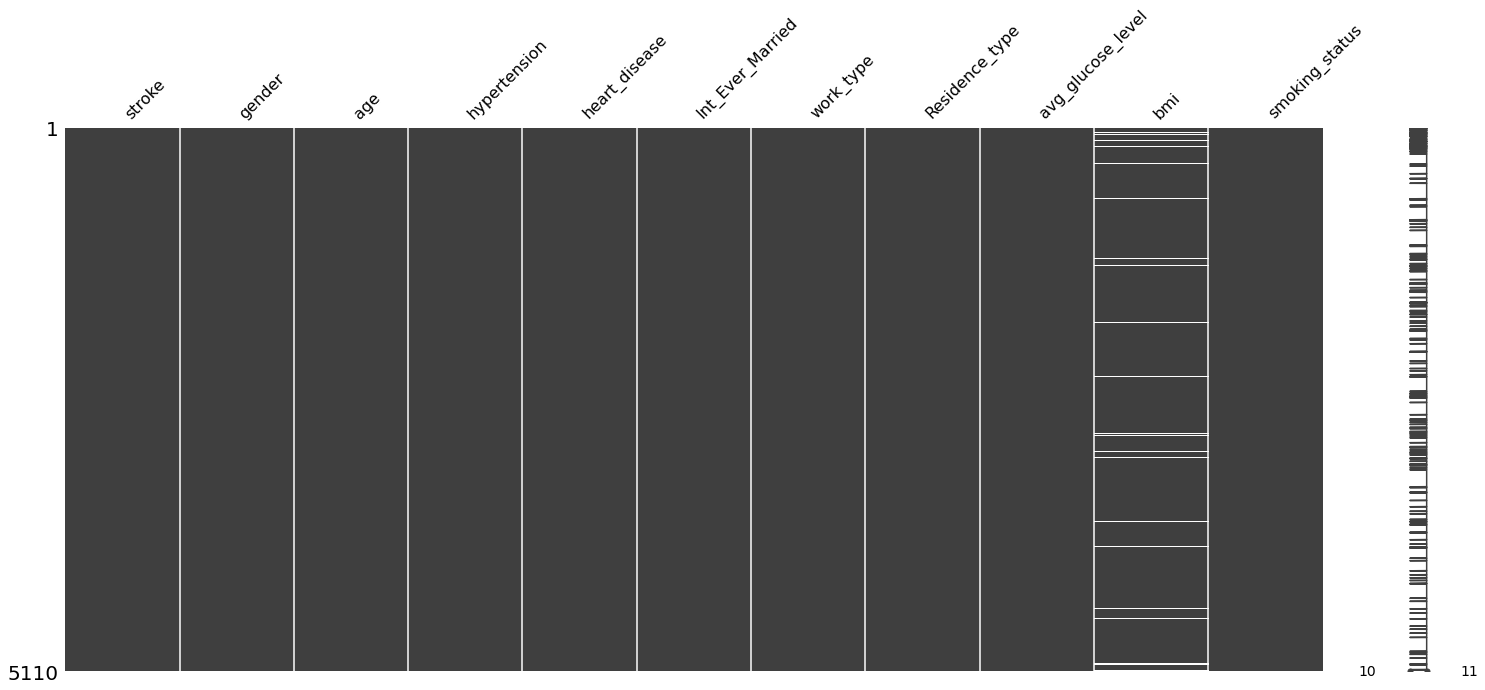

In [13]:
#дослідим пропуски на наявність закономірностей, 
msno.matrix(data_mod2)

<AxesSubplot:>

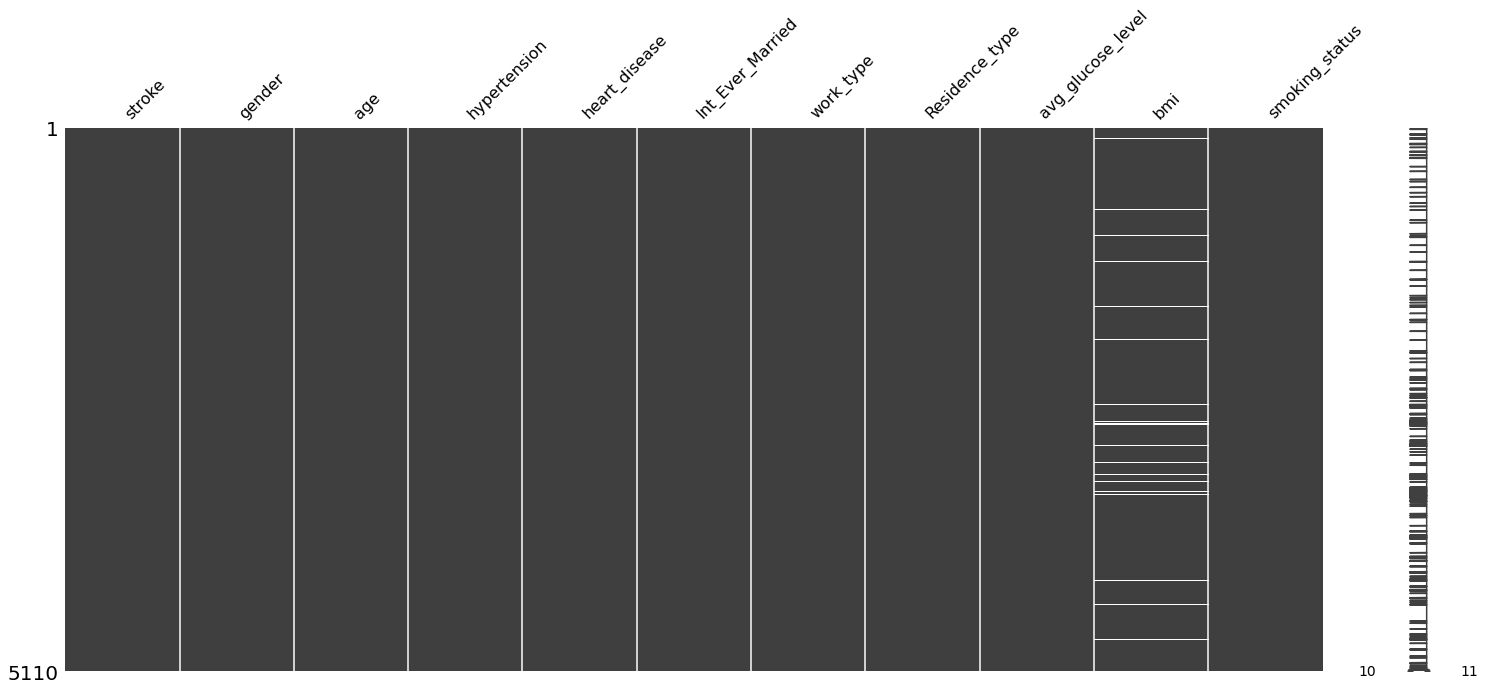

In [14]:
sorted = data_mod2.sort_values('age')
# sorted = data_mod2.sort_values('gender')
msno.matrix(sorted)

In [15]:
gen1 = data_mod2[data_mod2['gender'] == 'Male']['bmi'].isna().sum()
gen0 = data_mod2[data_mod2['gender'] == 'Female']['bmi'].isna().sum()
print(f'кореляції між невказанням показників індексу маси тіла та статтю не виявлено. {gen1} проти {gen0} ')

кореляції між невказанням показників індексу маси тіла та статтю не виявлено. 104 проти 97 


In [16]:
# замінимо всі пропуски bmi на медіанні значення

data['bmi'].fillna(data['bmi'].median(), inplace = True)
data['bmi'].isna().sum()

0

In [17]:
# data.describe()

# Побудова Моделей

Беремо не змінені ніяк данні + лише заповнені пробіли

In [18]:
# data.columns

In [19]:
Data_1 = data[['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke']].copy()
# Data_1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


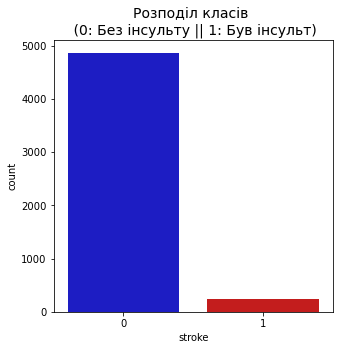

Кількість пацієнтів без інсульту 95.13% в досдіжуваному датасеті
Кількість пацієнтів з інсультом 4.87% в датасеті


In [20]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(5, 5))
colors = ["#0101DF", "#DF0101"]

sns.countplot('stroke', data=Data_1, palette=colors)
plt.title('Розподіл класів \n (0: Без інсульту || 1: Був інсульт)', fontsize=14)
plt.show()

A12 = round(Data_1['stroke'].value_counts()[0]/len(Data_1) * 100,2)
A11 = round(Data_1['stroke'].value_counts()[1]/len(Data_1) * 100,2)
print(f'Кількість пацієнтів без інсульту {A12}% в досдіжуваному датасеті')
print(f'Кількість пацієнтів з інсультом {A11}% в датасеті')

# round(Data_1['stroke'].value_counts()[0]/len(Data_1) * 100,2)

В нас присутній дисбаланс данних що негативно впливає на визначення пацієнтів з інсультом, штучно збільшимо кількість пацієнтів з інсультом

In [21]:
Data_1 = Data_1.sample(frac=1)

fraud_Data_1 = Data_1.loc[Data_1['stroke'] == 1]
non_fraud_Data_1 = Data_1.loc[Data_1['stroke'] == 0][:len(fraud_Data_1)]

normal_distributed_Data_1 = pd.concat([fraud_Data_1, non_fraud_Data_1])
new_Data_1 = normal_distributed_Data_1.sample(frac=1, random_state=42)

new_Data_1.shape

(498, 11)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


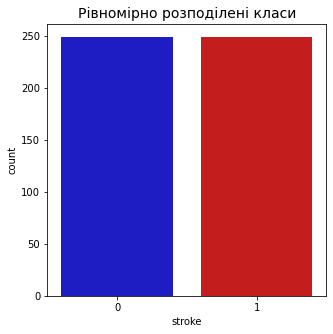

Новий розподіл класу stroke у наборі даних
0    0.5
1    0.5
Name: stroke, dtype: float64


In [22]:
fig, ax = plt.subplots(figsize=(5, 5))


sns.countplot('stroke', data=new_Data_1, palette=colors)
plt.title('Рівномірно розподілені класи', fontsize=14)
plt.show()

print('Новий розподіл класу stroke у наборі даних')
print(new_Data_1['stroke'].value_counts()/len(new_Data_1))

Розділення данних на тренувальні та тестувальні

In [23]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(new_Data_1, test_size=0.20, random_state=20)
print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 398 
The size of testing data is: 100


In [24]:
train_data.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

Розділяєм данні, виділяєм таргет

In [25]:
X_train = train_data.drop(['stroke'], axis=1)
y_train = train_data['stroke']

X_test = test_data.drop(['stroke'], axis=1)
y_test = test_data['stroke']


Перетворення данних

In [26]:
# Перетворим категорійні данні за допомогою sklearn  LabelEncoder в циферкі
from sklearn import preprocessing

X_train_prepared=X_train.copy()
X_test_prepared=X_test.copy()

col = ['gender', 'ever_married', 'smoking_status', 'work_type','Residence_type']
LE = preprocessing.LabelEncoder()
for i in col:
    X_train_prepared[i]=X_train_prepared[[i]].apply(LE.fit_transform)
    X_test_prepared[i]=X_test_prepared[[i]].apply(LE.transform)
    
    print(LE.inverse_transform(list(set(X_train_prepared[i]))),'==', list(set(X_train_prepared[i]))) 
    print(X_train_prepared[i].value_counts(dropna=False))               
              


['Female' 'Male'] == [0, 1]
0    237
1    161
Name: gender, dtype: int64
['No' 'Yes'] == [0, 1]
1    308
0     90
Name: ever_married, dtype: int64
['Unknown' 'formerly smoked' 'never smoked' 'smokes'] == [0, 1, 2, 3]
2    140
0     95
1     88
3     75
Name: smoking_status, dtype: int64
['Govt_job' 'Private' 'Self-employed' 'children'] == [0, 1, 2, 3]
1    234
2     81
0     57
3     26
Name: work_type, dtype: int64
['Rural' 'Urban'] == [0, 1]
1    200
0    198
Name: Residence_type, dtype: int64


Стандартизація набору даних

In [27]:
# маєм викиди тому використаємо RobustScaler
from sklearn.preprocessing import RobustScaler
rob_scaler = RobustScaler()

X_train_rob_scaler=rob_scaler.fit_transform(X_train_prepared)
X_test_rob_scaler=rob_scaler.transform(X_test_prepared)



In [28]:
#Для категорійних задач лінійна регресія не підходить!!! 


#from sklearn.linear_model import LinearRegression
# from sklearn.metrics import mean_squared_error
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

# lr = LinearRegression(normalize=True, n_jobs=-1)
# lr.fit(X_train, y_train)

# y_pred = lr.predict(X_test)
# print('Score = ', mean_squared_error(y_test, y_pred, squared=False))
# abs(lr.coef_).min(), abs(lr.coef_).max()

In [29]:
# confusion_matrix(y_test, y_pred)

In [30]:
#Спробуємо дерево прийняття рішень


from sklearn.tree import DecisionTreeClassifier

one_tree = DecisionTreeClassifier(max_depth = 7)
one_tree.fit(X_train_rob_scaler, y_train)

DecisionTreeClassifier(max_depth=7)

In [31]:
from sklearn.ensemble import RandomForestClassifier

forest_clf_basic = RandomForestClassifier()
forest_clf_basic.fit(X_train_rob_scaler, y_train)

RandomForestClassifier()

In [32]:
#додаткові параметри для RandomForestClassifier
# n_estimators - скільки дерев тренуєм
# n_jobs - скільки одночасно запускаєм процесів на ПК


forest_clf = RandomForestClassifier(n_estimators=25,
                                    min_samples_split=2,
                                    max_depth=None,
                                    random_state=42,
                                    n_jobs=-1,
                                   )

forest_clf.fit(X_train_rob_scaler, y_train)

RandomForestClassifier(n_estimators=25, n_jobs=-1, random_state=42)

In [33]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def results(input_data,model,labels):
    
    preds = model.predict(input_data)
#     preds = (model.predict_proba(input_data) > 0.6
    
    acc = accuracy_score(labels,preds)
    print('Accuracy = ', acc)
    
    cm = confusion_matrix(labels,preds)
    print(cm)
    
    report = classification_report(labels,preds)
    report = print(report)
    

# Train Data (Дані замінено лиш пропуски)

In [34]:
# результат для одного дерева
print('result one tree')
results(X_train_rob_scaler, one_tree, y_train)
print('Видно що одне дерево робить більше помилок ніж ліс')
print()
print('result forest')
results(X_train_rob_scaler, forest_clf_basic, y_train)
print('Виглядає так що ліс перетренований - всі результати вірні')

result one tree
Accuracy =  0.9020100502512562
[[169  31]
 [  8 190]]
              precision    recall  f1-score   support

           0       0.95      0.84      0.90       200
           1       0.86      0.96      0.91       198

    accuracy                           0.90       398
   macro avg       0.91      0.90      0.90       398
weighted avg       0.91      0.90      0.90       398

Видно що одне дерево робить більше помилок ніж ліс

result forest
Accuracy =  1.0
[[200   0]
 [  0 198]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       198

    accuracy                           1.00       398
   macro avg       1.00      1.00      1.00       398
weighted avg       1.00      1.00      1.00       398

Виглядає так що ліс перетренований - всі результати вірні


# Test Data(Дані замінено лиш пропуски)

In [35]:
print('result one tree')
results(X_test_rob_scaler, one_tree, y_test)
print()
print('result forest')
results(X_test_rob_scaler, forest_clf_basic, y_test)

result one tree
Accuracy =  0.77
[[36 13]
 [10 41]]
              precision    recall  f1-score   support

           0       0.78      0.73      0.76        49
           1       0.76      0.80      0.78        51

    accuracy                           0.77       100
   macro avg       0.77      0.77      0.77       100
weighted avg       0.77      0.77      0.77       100


result forest
Accuracy =  0.85
[[39 10]
 [ 5 46]]
              precision    recall  f1-score   support

           0       0.89      0.80      0.84        49
           1       0.82      0.90      0.86        51

    accuracy                           0.85       100
   macro avg       0.85      0.85      0.85       100
weighted avg       0.85      0.85      0.85       100



Задля того щоб розпізнавати всіх пацієнтів з інсультом, треба дуже сильно змістити алгоритм 0.5 -> 0.25

In [36]:
y_pred =forest_clf_basic.predict_proba(X_test_rob_scaler)[:,1] >= 0.25
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print('Accuracy = ', acc)
print(cm)
print(report)

Accuracy =  0.79
[[31 18]
 [ 3 48]]
              precision    recall  f1-score   support

           0       0.91      0.63      0.75        49
           1       0.73      0.94      0.82        51

    accuracy                           0.79       100
   macro avg       0.82      0.79      0.78       100
weighted avg       0.82      0.79      0.78       100



# Спробуємо отримати кращі результати, застосуєм данні погруповані

In [37]:
data_mod

,Int_Gender,age,hypertension,heart_disease,Int_Ever_Married,Alt_Work_type,Int_Residence_type,avg_glucose_level,bmi,Int_Smoking_status,stroke
0,1,67.0,0,1,1,Company_worker,0,228.69,36.6,1,1
1,0,61.0,0,0,1,Self-employed,1,202.21,NaN,0,1
2,1,80.0,0,1,1,Company_worker,1,105.92,32.5,0,1
3,0,49.0,0,0,1,Company_worker,0,171.23,34.4,1,1
4,0,79.0,1,0,1,Self-employed,1,174.12,24.0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,Company_worker,0,83.75,NaN,0,0
5106,0,81.0,0,0,1,Self-employed,0,125.20,40.0,0,0
5107,0,35.0,0,0,1,Self-employed,1,82.99,30.6,0,0
5108,1,51.0,0,0,1,Company_worker,1,166.29,25.6,1,0


In [38]:
# Викинемо точки що вибиваються з рівномірного розподілу
data_mod = data_mod.drop(index=[162, 245])

In [39]:
data_mod = data_mod[data_mod['bmi']<50]

In [40]:
# замінимо всі пропуски bmi на медіанні значення

data_mod['bmi'].fillna(data_mod['bmi'].median(), inplace = True)
data_mod['bmi'].isna().sum()

0

В нас дисбаланс данних, для виправлення цієї проблеми спробуєм іншу стратегію Random Oversampling

In [41]:
# data_mod = data_mod.sample(frac=1)

# fraud_data_mod = data_mod.loc[data_mod['stroke'] == 1]
# non_fraud_data_mod = data_mod.loc[data_mod['stroke'] == 0][:len(fraud_data_mod)]

# normal_distributed_data_mod = pd.concat([fraud_data_mod, non_fraud_data_mod])
# new_data_mod = normal_distributed_data_mod.sample(frac=1, random_state=42)

# new_data_mod.shape

In [42]:
# from sklearn.model_selection import train_test_split

# train_data, test_data = train_test_split(data_mod, test_size=0.20, random_state=20)
# print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

In [43]:
# X_train = train_data.drop(['stroke'], axis=1)
# y_train = train_data['stroke']

# X_test = test_data.drop(['stroke'], axis=1)
# y_test = test_data['stroke']

In [44]:
from sklearn.utils import resample

train_data, test_data = train_test_split(data_mod, test_size=0.20, random_state=20,
                                         stratify=data_mod['stroke'])

X_test = test_data.drop(['stroke'], axis=1)
y_test = test_data['stroke']

fraud_df = train_data.loc[train_data['stroke'] == 1]
non_fraud_df = train_data.loc[train_data['stroke'] == 0]

fraud_upsampled = resample(fraud_df,
                           replace=True, # sample with replacement
                           n_samples=len(non_fraud_df), # match number in majority class
                           random_state=27)

new_train_data = pd.concat([non_fraud_df, fraud_upsampled])

X_train = new_train_data.drop(['stroke'], axis=1)
y_train = new_train_data['stroke']

print('Shape of train data = ', X_train.shape)
print('Shape of test data = ', X_test.shape)

train_unique_label, train_counts_label = np.unique(y_train, return_counts=True)
test_unique_label, test_counts_label = np.unique(y_test, return_counts=True)

print('Label Distributions: \n')
print(train_counts_label/ len(y_train))
print(test_counts_label/ len(y_test))

Shape of train data =  (7394, 10)
Shape of test data =  (966, 10)
Label Distributions: 

[0.5 0.5]
[0.95755694 0.04244306]


In [45]:
print(sum(y_train), len(y_train))

3697 7394


In [46]:
#Перетворення категорійного стовпчика в цифровий за допомогою LabelEncoder()

X_train_prepared=X_train.copy()
X_test_prepared=X_test.copy()

col = ['Alt_Work_type']
LE = preprocessing.LabelEncoder()
for i in col:
    X_train_prepared[i]=X_train_prepared[[i]].apply(LE.fit_transform)
    X_test_prepared[i]=X_test_prepared[[i]].apply(LE.transform)
    
    print(LE.inverse_transform(list(set(X_train_prepared[i]))),'==', list(set(X_train_prepared[i]))) 
    print(X_train_prepared[i].value_counts(dropna=False))     

['Company_worker' 'Never_worked' 'Self-employed'] == [0, 1, 2]
0    5429
2    1426
1     539
Name: Alt_Work_type, dtype: int64


Стандартизація набору даних дані погруповані, можна спробувати StandardScaler

In [47]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaler=scaler.fit_transform(X_train_prepared)
X_test_scaler=scaler.transform(X_test_prepared)

In [48]:
#Спробуємо дерево прийняття рішень


from sklearn.tree import DecisionTreeClassifier

one_tree = DecisionTreeClassifier(max_depth = 7)
one_tree.fit(X_train_scaler, y_train)

DecisionTreeClassifier(max_depth=7)

In [49]:
from sklearn.ensemble import RandomForestClassifier

forest_clf_basic = RandomForestClassifier()
forest_clf_basic.fit(X_train_scaler, y_train)

RandomForestClassifier()

In [50]:
#додаткові параметри для RandomForestClassifier
# n_estimators - скільки дерев тренуєм
# n_jobs - скільки одночасно запускаєм процесів на ПК


forest_clf = RandomForestClassifier(n_estimators=50,
                                    min_samples_split=2,
                                    max_depth=None,
                                    random_state=42,
                                    n_jobs=-1,
                                   )

forest_clf.fit(X_train_scaler, y_train)

RandomForestClassifier(n_estimators=50, n_jobs=-1, random_state=42)

# Train Data (Дані домножено та погруповано)

In [51]:
# результат для одного дерева
print('result one tree')
results(X_train_scaler, one_tree, y_train)
print('Видно що одне дерево робить дуже багато хибно негативних передбачень 125')
print()
print('result forest')
results(X_train_scaler, forest_clf_basic, y_train)
print('Виглядає так що ліс перетренований - всі результати вірні')

result one tree
Accuracy =  0.8838247227481741
[[2915  782]
 [  77 3620]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      3697
           1       0.82      0.98      0.89      3697

    accuracy                           0.88      7394
   macro avg       0.90      0.88      0.88      7394
weighted avg       0.90      0.88      0.88      7394

Видно що одне дерево робить дуже багато хибно негативних передбачень 125

result forest
Accuracy =  1.0
[[3697    0]
 [   0 3697]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3697
           1       1.00      1.00      1.00      3697

    accuracy                           1.00      7394
   macro avg       1.00      1.00      1.00      7394
weighted avg       1.00      1.00      1.00      7394

Виглядає так що ліс перетренований - всі результати вірні


# Test Data(Дані домножено та погруповано)

In [52]:
print('result one tree')
results(X_test_scaler, one_tree, y_test)
print()
print('result forest')
results(X_test_scaler, forest_clf_basic, y_test)

result one tree
Accuracy =  0.7629399585921325
[[707 218]
 [ 11  30]]
              precision    recall  f1-score   support

           0       0.98      0.76      0.86       925
           1       0.12      0.73      0.21        41

    accuracy                           0.76       966
   macro avg       0.55      0.75      0.53       966
weighted avg       0.95      0.76      0.83       966


result forest
Accuracy =  0.9523809523809523
[[918   7]
 [ 39   2]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       925
           1       0.22      0.05      0.08        41

    accuracy                           0.95       966
   macro avg       0.59      0.52      0.53       966
weighted avg       0.93      0.95      0.94       966



In [53]:
y_pred =forest_clf_basic.predict_proba(X_test_scaler)[:,1] >= 0.02
cm = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)


print('Accuracy = ', acc)
print(cm)
print(report)

Accuracy =  0.5693581780538303
[[512 413]
 [  3  38]]
              precision    recall  f1-score   support

           0       0.99      0.55      0.71       925
           1       0.08      0.93      0.15        41

    accuracy                           0.57       966
   macro avg       0.54      0.74      0.43       966
weighted avg       0.96      0.57      0.69       966



Отриманий результат показує що модель чудово визначає здорових, але погано хворих(людей з інсультом), спробуємо змістити thresholds

In [54]:
from sklearn.model_selection import cross_val_predict

y_scores = forest_clf_basic.predict_proba(X_train_scaler)
np.shape(y_scores)


(7394, 2)

In [55]:
y_scores0, y_scores1 = y_scores[:,0], y_scores[:,1]
# print(np.shape(y_scores0))
# print(np.shape(y_test))

In [56]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores1)
print(thresholds)
# print()
# print(recalls)
# for i in [precisions, recalls, thresholds]:
#     print(len(i))


[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1  0.11 0.12 0.13
 0.14 0.15 0.16 0.17 0.18 0.19 0.2  0.21 0.22 0.23 0.24 0.25 0.26 0.27
 0.28 1.  ]


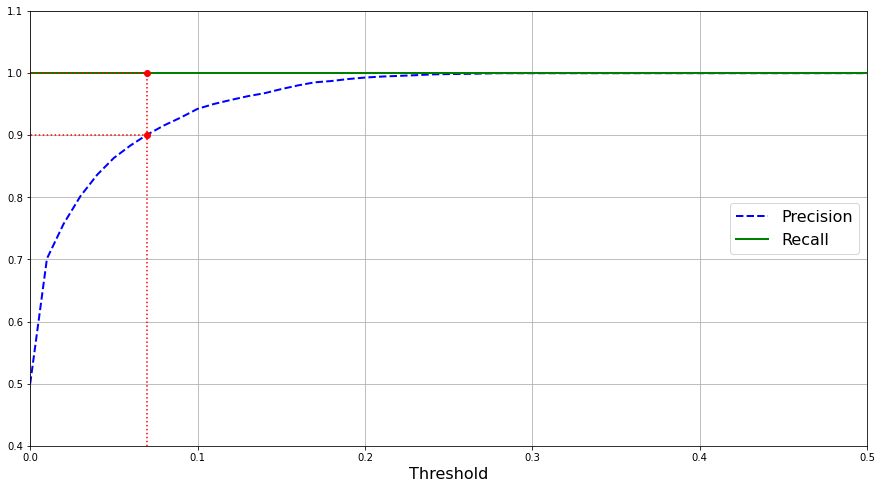

In [57]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16)
    plt.xlabel("Threshold", fontsize=16)
    plt.grid(True)                      
    plt.axis([0, 0.5, 0.4, 1.1])     



recall_90_precision = recalls[np.argmax(precisions >= 0.90)]
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]


plt.figure(figsize=(15, 8))                                                                  
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.plot([threshold_90_precision, threshold_90_precision], [0., 1], "r:")                 
plt.plot([-15, threshold_90_precision], [0.9, 0.9], "r:")                                
plt.plot([-15, threshold_90_precision], [recall_90_precision, recall_90_precision], "r:")
plt.plot([threshold_90_precision], [0.9], "ro")                                             
plt.plot([threshold_90_precision], [recall_90_precision], "ro")                             
plt.show()